## Ejercicio Regresión Lineal

Predecir el precio de una casa basado en su tamaño (en metros cuadrados). 

Pasos a seguir:

1. Generar datos sintéticos: Crear un conjunto de datos con diferentes tamaños de casas y sus respectivos precios.
2. Dividir los datos en entrenamiento y prueba.
3. Entrenar un modelo de regresión lineal usando LinearRegression de sklearn.
4. Realizar predicciones con el modelo entrenado.
5. Visualizar los resultados con una gráfica de dispersión y la recta de regresión.

In [1146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1️⃣ Generar datos sintéticos

In [1147]:

np.random.seed(42)  # Fijar la semilla para reproducibilidad
X = 50 + 250 * np.random.rand(100, 1)  # Tamaño de casas en metros cuadrados (entre 50 y 300)
y = 50000 + 300 * X + np.random.randn(100, 1) * 10000  # Precio de la casa con ruido

### 2️⃣ Dividir los datos en entrenamiento y prueba (80% - 20%)

In [1148]:
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=42)

### 3️⃣ Inicializar y entrenar el modelo de regresión lineal

In [1149]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4️⃣ Realizar predicciones

In [1150]:
y_predict = modelo.predict(X_val)

### 5️⃣ Evaluar el modelo

In [1151]:
MSE = mean_squared_error(y_val,y_predict)
print(f"MSE: {MSE}")

MSE: 65369951.3717003


In [1152]:
RMSE = MSE**1/2
print(f"RMSE: {RMSE}")
from sklearn.metrics import r2_score
print(r2_score(y_val,y_predict))

RMSE: 32684975.68585015
0.8740102909428756


### 6️⃣ Visualizar los resultados

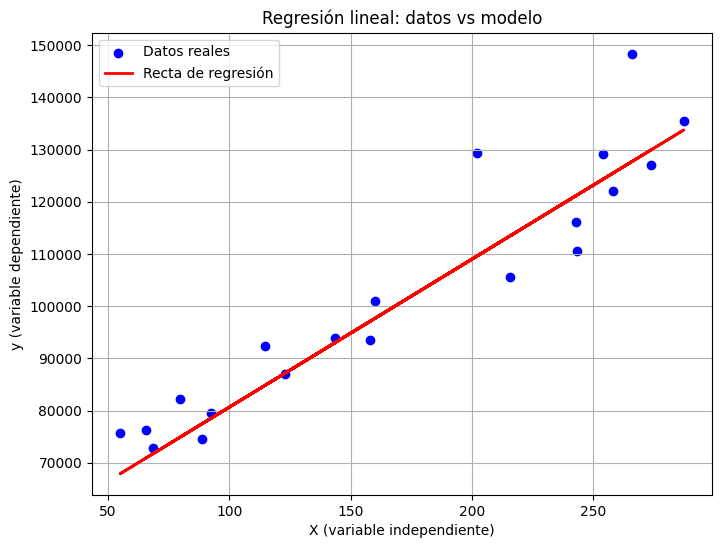

In [1153]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val, y_val, color='blue', label='Datos reales')
plt.plot(X_val, y_predict, color='red', linewidth=2, label='Recta de regresión')
plt.xlabel('X (variable independiente)')
plt.ylabel('y (variable dependiente)')
plt.title('Regresión lineal: datos vs modelo')
plt.legend()
plt.grid(True)
plt.show()

### Preguntas

1. ¿Cómo afecta la pendiente 𝑤1 a la predicción del precio?

2. ¿Qué significa el intercepto 𝑤0?

3. ¿Cómo cambia el modelo si aumentamos el ruido en los datos?

4. Añadir más variables: Incluir más características como el número de habitaciones.

## Parte 2

Ejercicio 2: Implementación de Regresión Lineal Usando Solo NumPy (Sin Scikit-Learn)

Objetivo del ejercicio

Implementar la regresión lineal desde cero, sin utilizar sklearn. 

Aplicar las fórmulas de regresión lineal usando álgebra matricial con NumPy.


In [1154]:
#X = (X - np.mean(X)) / np.std(X)
#y = (y - np.mean(y)) / np.std(y)

In [1155]:
# Agregar columna de unos a X para el término de sesgo
 # Agrega una columna de unos (para el sesgo)
X_train2 = np.hstack([np.ones((80, 1)), X_train])
X_train2
X_val2 = np.hstack([np.ones((20, 1)), X_val])

In [1156]:
# Inicialización de parámetros
theta = np.random.randn(X_train2.shape[1], 1)
learning_rate = 0.00002
epochs = 1000000

In [1157]:
theta

array([[0.01300189],
       [1.45353408]])

In [1158]:
# Algoritmo de descenso por el gradiente
for epoch in range(epochs):
    y_pred = X_train2 @ theta
    loss = np.mean((y_pred - y_train)**2)
    grad = 2 * X_train2.T @ (y_pred - y_train) / 80


    theta -= learning_rate * grad


In [1159]:
print(f"Bias (intercepto): {theta[0][0]:,.2f}")
print(f"Pesos: {theta[1:].flatten()}")

Bias (intercepto): 52,143.92
Pesos: [284.38821249]


In [1160]:
bias = modelo.intercept_
weights = modelo.coef_

print(bias)
print(f"Pesos (coeficientes): {weights}")

[52231.83856466]
Pesos (coeficientes): [[283.9458926]]


In [1161]:
print("Max y_pred:", np.max(y_pred))
print("Max grad:", np.max(grad))
print("Theta:", theta)

Max y_pred: 136528.08608633504
Max grad: 0.14125551077886483
Theta: [[52143.92222717]
 [  284.38821249]]


In [1162]:
# Realizar predicciones
# Multiplicación matricial para obtener las predicciones
y_val_pred = X_val2 @ theta

In [1163]:
# Calcular el Error Cuadrático Medio (MSE)
print(np.mean((y_val - y_val_pred) ** 2))


65489666.00372149


In [1164]:
print(r2_score(y_val,y_val_pred))

0.8737795609003755


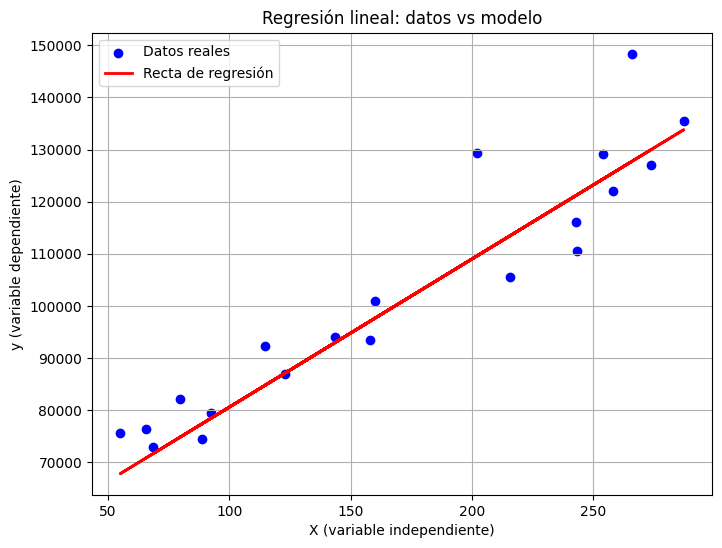

In [1165]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_val, y_val, color='blue', label='Datos reales')
plt.plot(X_val, y_val_pred, color='red', linewidth=2, label='Recta de regresión')
plt.xlabel('X (variable independiente)')
plt.ylabel('y (variable dependiente)')
plt.title('Regresión lineal: datos vs modelo')
plt.legend()
plt.grid(True)
plt.show()